In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import datetime
%matplotlib inline

#For converting different currencies to USD
from forex_python.converter import CurrencyRates

#Counting the number of occurences of words
from sklearn.feature_extraction.text import CountVectorizer

#lexicon and rule-based sentiment analysis tool 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#Preprocessing
from sklearn import preprocessing

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
import glob
import os
import json

Data from https://webrobots.io/kickstarter-datasets/

## Data Wrangling

In [3]:
path =r'D:\Github Repos\Projects\Kickstarter_project\data\kickstarter\KS\KS1' 
all_files = glob.glob(os.path.join(path, "*.csv"))     

df_from_each_file = (pd.read_csv(f, encoding='latin1', index_col=0) for f in all_files)
concatenated_df   = pd.concat(df_from_each_file, ignore_index=True)


C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: DtypeWarning: Columns (29,30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: DtypeWarning: Columns (30,31,32,33) have mixed types. Specify dtype option on import or set low_memory=False.
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: DtypeWarning: Columns (33,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.


In [4]:
#Scraped data contains multiple entries of same project, keeping only the first entry
concatenated_df.drop_duplicates(subset='id', keep="first", inplace=True )

In [5]:
len(concatenated_df)
concatenated_df.head()

226644

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,...,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
0,12,"Debauchery, laughter, violence and politics. W...","{""urls"":{""web"":{""discover"":""http://www.kicksta...",NaN,GB,1431610619,"{""urls"":{""web"":{""user"":""https://www.kickstarte...",GBP,£,False,...,royal-holloways-drama-society-presents-posh,https://www.kickstarter.com/discover/categorie...,True,False,successful,1433113212,1.572673,"{""web"":{""project"":""https://www.kickstarter.com...",379.014248,NaN
1,40,Bring a touring character education play about...,"{""urls"":{""web"":{""discover"":""http://www.kicksta...",NaN,US,1402512498,"{""urls"":{""web"":{""user"":""https://www.kickstarte...",USD,$,True,...,kylie-for-president,https://www.kickstarter.com/discover/categorie...,True,False,successful,1405915140,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",3530.000000,NaN
2,57,1984. An IRA bomb explodes at the Grand Hotel....,"{""urls"":{""web"":{""discover"":""http://www.kicksta...",NaN,GB,1408884944,"{""urls"":{""web"":{""user"":""https://www.kickstarte...",GBP,£,False,...,the-bombing-of-the-grand-hotel-a-compelling-ne...,https://www.kickstarter.com/discover/categorie...,True,False,successful,1411771384,1.658939,"{""web"":{""project"":""https://www.kickstarter.com...",5053.127524,NaN
3,114,Zoe is a teenage girl growing up in a deeply d...,"{""urls"":{""web"":{""discover"":""http://www.kicksta...",NaN,GB,1406837195,"{""urls"":{""web"":{""user"":""https://www.kickstarte...",GBP,£,False,...,child-z,https://www.kickstarter.com/discover/categorie...,True,False,successful,1415191920,1.618854,"{""web"":{""project"":""https://www.kickstarter.com...",7357.690612,NaN
4,31,Theaterprojekt 12. Kl. Waldorfschule Essen. 2 ...,"{""urls"":{""web"":{""discover"":""http://www.kicksta...",NaN,DE,1467313927,"{""urls"":{""web"":{""user"":""https://www.kickstarte...",EUR,,False,...,fausthier-und-jetzt,https://www.kickstarter.com/discover/categorie...,True,False,successful,1472936230,1.113958,"{""web"":{""project"":""https://www.kickstarter.com...",5012.810505,NaN


In [6]:
ks=concatenated_df.copy(True)

In [7]:
ks.country.value_counts()

US    174795
GB     20845
CA      9278
AU      5040
DE      2606
FR      1938
IT      1839
NL      1833
ES      1493
SE      1141
MX      1125
NZ       920
DK       754
IE       519
CH       493
NO       477
BE       414
HK       408
AT       353
SG       318
LU        34
JP        21
Name: country, dtype: int64

In [8]:
# I select only projects originating in the US
ks_us=ks[ks.country=='US']

In [10]:
ks_us.head()

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,...,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
1,40,Bring a touring character education play about...,"{""urls"":{""web"":{""discover"":""http://www.kicksta...",NaN,US,1402512498,"{""urls"":{""web"":{""user"":""https://www.kickstarte...",USD,$,True,...,kylie-for-president,https://www.kickstarter.com/discover/categorie...,True,False,successful,1405915140,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",3530.0,NaN
6,16,The Black and White Theatre Company Inc. is a ...,"{""urls"":{""web"":{""discover"":""http://www.kicksta...",NaN,US,1408428655,"{""urls"":{""web"":{""user"":""https://www.kickstarte...",USD,$,True,...,the-black-and-white-theatre-company-inc,https://www.kickstarter.com/discover/categorie...,True,False,successful,1410550485,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",1030.0,NaN
7,199,Goldfish Memory Productions seeks at least $12...,"{""urls"":{""web"":{""discover"":""http://www.kicksta...",NaN,US,1402111987,"{""urls"":{""web"":{""user"":""https://www.kickstarte...",USD,$,True,...,goldfish-memory-productions,https://www.kickstarter.com/discover/categorie...,True,False,successful,1404359941,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",12348.5,NaN
9,30,Bert V. Royal makes a strong statement about d...,"{""urls"":{""web"":{""discover"":""http://www.kicksta...",NaN,US,1396409030,"{""urls"":{""web"":{""user"":""https://www.kickstarte...",USD,$,True,...,dog-sees-god-confessions-of-a-teenage-blockhead-0,https://www.kickstarter.com/discover/categorie...,True,False,successful,1404190740,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",2202.0,NaN
10,34,In The Dudleys! family memories are brought to...,"{""urls"":{""web"":{""discover"":""http://www.kicksta...",NaN,US,1469362954,"{""urls"":{""web"":{""user"":""https://www.kickstarte...",USD,$,True,...,loading-dock-theatre-presents-the-dudleys-a-fa...,https://www.kickstarter.com/discover/categorie...,True,False,successful,1475664834,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",3383.0,NaN


In [11]:
ks_us.state.value_counts()

failed        75908
successful    69307
live          19714
canceled       9294
suspended       572
Name: state, dtype: int64

In [12]:
# I select only projects that are successful or have failed to convert the question to a binary problem
ks_us=ks_us[(ks_us.state=='successful')|(ks_us.state=='failed')]

In [13]:
ks_us.head()

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,...,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
1,40,Bring a touring character education play about...,"{""urls"":{""web"":{""discover"":""http://www.kicksta...",NaN,US,1402512498,"{""urls"":{""web"":{""user"":""https://www.kickstarte...",USD,$,True,...,kylie-for-president,https://www.kickstarter.com/discover/categorie...,True,False,successful,1405915140,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",3530.0,NaN
6,16,The Black and White Theatre Company Inc. is a ...,"{""urls"":{""web"":{""discover"":""http://www.kicksta...",NaN,US,1408428655,"{""urls"":{""web"":{""user"":""https://www.kickstarte...",USD,$,True,...,the-black-and-white-theatre-company-inc,https://www.kickstarter.com/discover/categorie...,True,False,successful,1410550485,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",1030.0,NaN
7,199,Goldfish Memory Productions seeks at least $12...,"{""urls"":{""web"":{""discover"":""http://www.kicksta...",NaN,US,1402111987,"{""urls"":{""web"":{""user"":""https://www.kickstarte...",USD,$,True,...,goldfish-memory-productions,https://www.kickstarter.com/discover/categorie...,True,False,successful,1404359941,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",12348.5,NaN
9,30,Bert V. Royal makes a strong statement about d...,"{""urls"":{""web"":{""discover"":""http://www.kicksta...",NaN,US,1396409030,"{""urls"":{""web"":{""user"":""https://www.kickstarte...",USD,$,True,...,dog-sees-god-confessions-of-a-teenage-blockhead-0,https://www.kickstarter.com/discover/categorie...,True,False,successful,1404190740,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",2202.0,NaN
10,34,In The Dudleys! family memories are brought to...,"{""urls"":{""web"":{""discover"":""http://www.kicksta...",NaN,US,1469362954,"{""urls"":{""web"":{""user"":""https://www.kickstarte...",USD,$,True,...,loading-dock-theatre-presents-the-dudleys-a-fa...,https://www.kickstarter.com/discover/categorie...,True,False,successful,1475664834,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",3383.0,NaN


In [14]:
len(ks_us)
ks_us.isnull().sum()

145215

backers_count                    0
blurb                            1
category                         0
converted_pledged_amount    145148
country                          0
created_at                       0
creator                          0
currency                         0
currency_symbol                  0
currency_trailing_code           0
current_currency            145148
deadline                         0
disable_communication            0
friends                     145215
goal                             0
id                               0
is_backing                  145215
is_starrable                144906
is_starred                  145215
launched_at                      0
location                       757
name                             1
permissions                 145215
photo                            0
pledged                          0
profile                          0
slug                             0
source_url                       0
spotlight           

In [15]:
#Dropping columns with multiple nans and columns that are not helpful in prediction
ks_us.drop(labels=['creator','photo', 'profile','source_url','urls','id','converted_pledged_amount','country', 'currency','currency_symbol','currency_trailing_code', 'current_currency', 'friends','is_backing','is_starrable', 'is_starred', 'permissions' , 'usd_type', 'static_usd_rate'], axis=1  , inplace=True  )
ks_us.dropna(axis=0, inplace=True)

In [16]:
#No more nans
len(ks_us)
ks_us.isnull().sum()

144457

backers_count            0
blurb                    0
category                 0
created_at               0
deadline                 0
disable_communication    0
goal                     0
launched_at              0
location                 0
name                     0
pledged                  0
slug                     0
spotlight                0
staff_pick               0
state                    0
state_changed_at         0
usd_pledged              0
dtype: int64

In [17]:
# New features: time in days from (i) launch to deadline and (ii) from create to launch
# Difference of unix timestamps gives seconds, I convert to days
ks_us['launch_to_deadline']=(ks_us.deadline-ks_us.launched_at)/3600/24 
ks_us['create_to_launch']=(ks_us.launched_at-ks_us.created_at)/3600/24
ks_us.drop(labels=['launched_at', 'created_at', 'deadline','state_changed_at'], axis=1  , inplace=True  )


In [20]:
#category and location within are in json format
ks_us.iloc[1]

backers_count                                                           16
blurb                    The Black and White Theatre Company Inc. is a ...
category                 {"urls":{"web":{"discover":"http://www.kicksta...
disable_communication                                                False
goal                                                                   800
location                 {"country":"US","urls":{"web":{"discover":"htt...
name                              The Black and White Theatre Company Inc.
pledged                                                               1030
slug                               the-black-and-white-theatre-company-inc
spotlight                                                             True
staff_pick                                                           False
state                                                           successful
usd_pledged                                                           1030
launch_to_deadline       

In [21]:
#extracting category from json and replacing column
cat = ks_us['category'].apply(json.loads)
cat2=pd.DataFrame(cat.tolist())
cat2.head()

,color,id,name,parent_id,position,slug,urls
0,16743775,285,Plays,17,6,theater/plays,{'web': {'discover': 'http://www.kickstarter.c...
1,16743775,285,Plays,17,6,theater/plays,{'web': {'discover': 'http://www.kickstarter.c...
2,16743775,285,Plays,17,6,theater/plays,{'web': {'discover': 'http://www.kickstarter.c...
3,16743775,285,Plays,17,6,theater/plays,{'web': {'discover': 'http://www.kickstarter.c...
4,16743775,285,Plays,17,6,theater/plays,{'web': {'discover': 'http://www.kickstarter.c...


In [22]:
# extracting category from json and replacing column
cat2_list=cat2.name.values.tolist()

In [24]:
# extracting category from json and replacing column
ks_us.drop(labels=['category'], axis=1  , inplace=True  )
ks_us['category']=cat2_list

In [26]:
#extracting location from json and replacing column
loc = ks_us['location'].apply(json.loads)
loc2=pd.DataFrame(loc.tolist())
loc2.head()

,country,displayable_name,id,is_root,localized_name,name,short_name,slug,state,type,urls
0,US,"Louisville, KY",2442327,False,NaN,Louisville,"Louisville, KY",louisville-ky,KY,Town,{'web': {'discover': 'https://www.kickstarter....
1,US,"Mint Hill, NC",2452209,False,NaN,Mint Hill,"Mint Hill, NC",mint-hill-nc,NC,Town,{'web': {'discover': 'https://www.kickstarter....
2,US,"New York, NY",2459115,False,NaN,New York,"New York, NY",new-york-ny,NY,Town,{'web': {'discover': 'https://www.kickstarter....
3,US,"Waukesha, WI",2515439,False,NaN,Waukesha,"Waukesha, WI",waukesha-wi,WI,Town,{'web': {'discover': 'https://www.kickstarter....
4,US,"Manhattan, NY",12589342,False,NaN,Manhattan,"Manhattan, NY",manhattan-ny,NY,County,{'web': {'discover': 'https://www.kickstarter....


In [27]:
#extracting location from json and replacing column
loc2_list=loc2.displayable_name.values.tolist()
loc2_type=loc2.type.values.tolist()

In [28]:
#extracting location from json and replacing column, also added new column location type
ks_us.drop(labels=['location'], axis=1  , inplace=True  )
ks_us['location']=loc2_list
ks_us['location_type']=loc2_type

In [30]:
# checking that new columns have no nans
ks_us.isnull().sum()

backers_count            0
blurb                    0
disable_communication    0
goal                     0
name                     0
pledged                  0
slug                     0
spotlight                0
staff_pick               0
state                    0
usd_pledged              0
launch_to_deadline       0
create_to_launch         0
category                 0
location                 0
location_type            0
dtype: int64

In [31]:
ks_us=ks_us.copy(True)

In [33]:
ks_us.state.value_counts()

failed        75566
successful    68891
Name: state, dtype: int64

In [34]:
ks_us['state']=ks_us['state'].map({'successful':1, 'failed':0})
ks_us['staff_pick']=ks_us['staff_pick'].map({True:1, False:0})
ks_us['spotlight']=ks_us['spotlight'].map({True:1, False:0})
ks_us['disable_communication']=ks_us['disable_communication'].map({True:1, False:0})

In [38]:
ks_us['slug']=ks_us['slug'].str.replace('-', ' ')

In [40]:
del cat, cat2, ks, loc, loc2, concatenated_df

In [128]:
ks_us['data']= ks_us['name']+' '+ks_us['blurb']
# ks_us['data']= ks_us['slug']

## Visualization

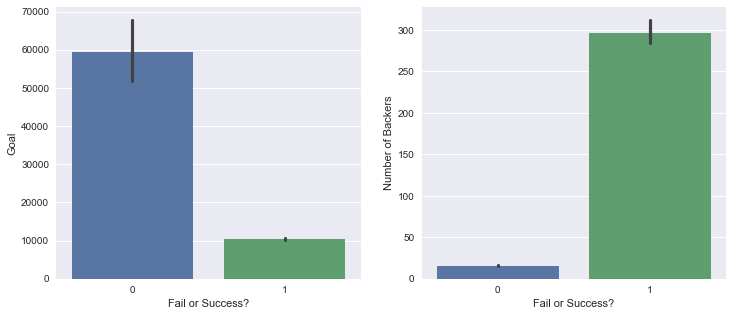

In [329]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(12, 5))

sns.barplot ('state','goal',  data=ks_us, ax=ax1)

sns.barplot ('state','backers_count',  data=ks_us, ax=ax2)
ax2.set(ylabel='Number of Backers', xlabel='Fail or Success?') 
ax1.set(ylabel='Goal', xlabel='Fail or Success?') 

In [325]:
print ("Median goal for successful projects is $%.2f"%ks_us[ks_us['state']==1]['goal'].median())   
print ("Median goal for failed projects is $%.2f"%ks_us[ks_us['state']==0]['goal'].median())

Median goal for successful projects is $4000.00
Median goal for failed projects is $6500.00


###  Successfully funded projects have \$ 2500 lower median goal!

In [316]:
tdf_counts=ks_us.groupby(['staff_pick'])['state'].value_counts(normalize=True).rename('percentage').mul(100).reset_index()
tdf_counts2_sp=tdf_counts[tdf_counts["state"]==1]
tdf_counts2_sp.head()

tdf_counts=ks_us.groupby(['spotlight'])['state'].value_counts(normalize=True).rename('percentage').mul(100).reset_index()
tdf_counts2_s=tdf_counts[tdf_counts["state"]==1]
tdf_counts2_s.head()

,staff_pick,state,percentage
1,0,1,42.653239
2,1,1,85.060620


,spotlight,state,percentage
1,1,1,100.0


(-1.5, 0.5)

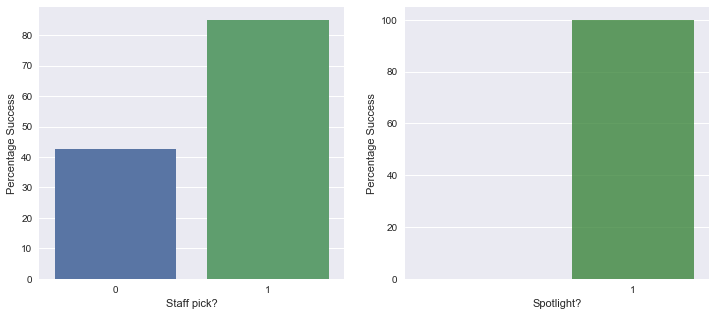

In [330]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(12, 5))

g=sns.barplot(x="staff_pick",y="percentage", data=tdf_counts2_sp, ax=ax1)
g=sns.barplot(x="spotlight",y="percentage", data=tdf_counts2_s, ax=ax2, palette=['forestgreen'], alpha=0.75)
ax2.set_xlim(-1.5,)
ax1.set(ylabel='Percentage Success', xlabel='Staff pick?') 
ax2.set(ylabel='Percentage Success', xlabel='Spotlight?')

### Projects under spotlight have a 100% chance of success.

### If the project is a staff pick, chance of success is doubled.

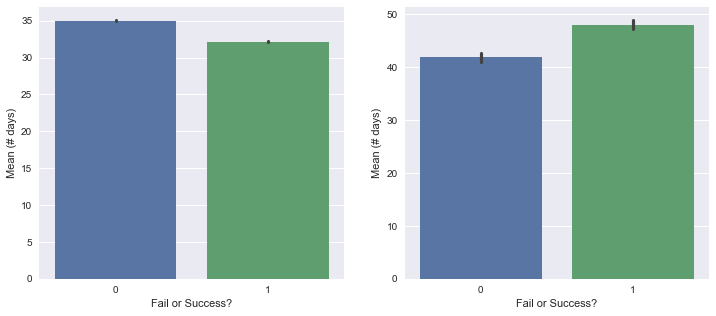

In [331]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(12, 5))

sns.barplot ('state','launch_to_deadline',  data=ks_us, ax=ax1)
 
sns.barplot ('state','create_to_launch',  data=ks_us, ax=ax2)

ax1.set(ylabel='Mean (# days)', xlabel='Fail or Success?') 
ax2.set(ylabel='Mean (# days)', xlabel='Fail or Success?')

(0, 65)

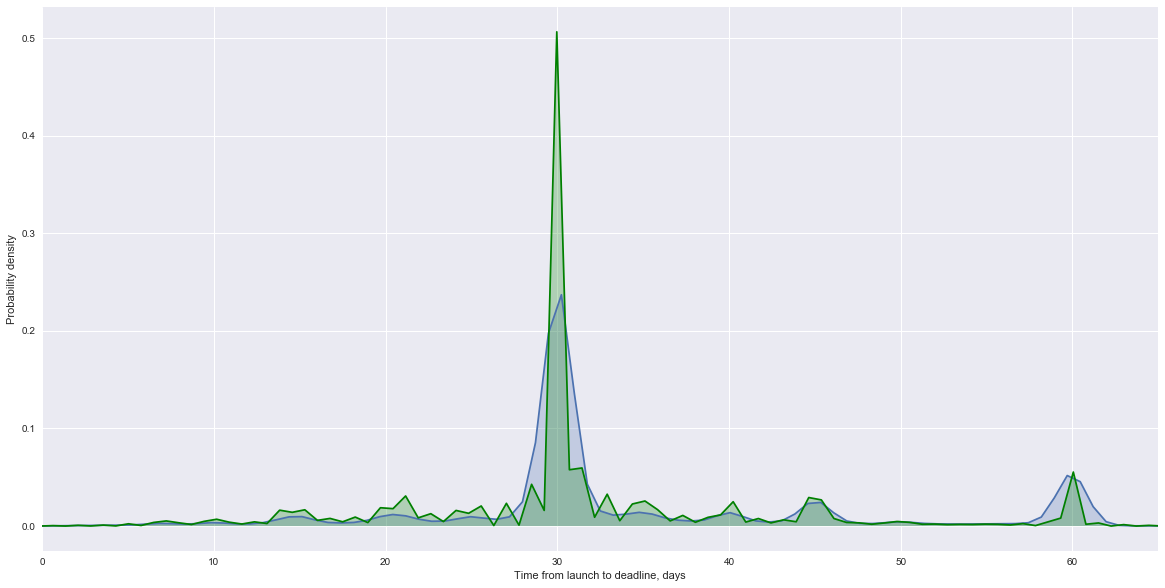

In [196]:
# Set up the matplotlib figure
f, ax1 = plt.subplots(figsize=(20, 10))
ax1=sns.kdeplot(ks_us[ks_us.state==0]['launch_to_deadline'], shade=True)

ax1=sns.kdeplot(ks_us[ks_us.state==1]['launch_to_deadline'], color='green', shade=True )
sns.plt.xlim(0,65)

ax1.set(xlabel='Time from launch to deadline, days', ylabel='Probability density') 
ax1.legend_.remove()
plt.show()

### 50 % of successful projects set the deadline to ~30 days after launch, while only half (~22 %) the number of failed projects did the same.

### 30 day projects may produce a sense of urgency while giving enough time to find backers.


In [340]:
tdf_counts=ks_us.groupby(['category'])['state'].value_counts(normalize=False).rename('count').mul(1).reset_index()
tdf_counts2=tdf_counts[tdf_counts["state"]==1]
tdf_counts2.head()

,category,state,count
1,3D Printing,1,133
3,Academic,1,108
5,Accessories,1,445
7,Action,1,64
9,Animals,1,38


In [341]:
tdf_counts=ks_us.groupby(['category'])['state'].value_counts(normalize=True).rename('percentage').mul(100).reset_index()
tdf_counts3=tdf_counts[tdf_counts["state"]==1]
tdf_counts3['count']=tdf_counts2['count']
tdf_counts3=tdf_counts3[tdf_counts3["count"]>50]
tdf_counts3=tdf_counts3.sort_values(by=["percentage"])

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


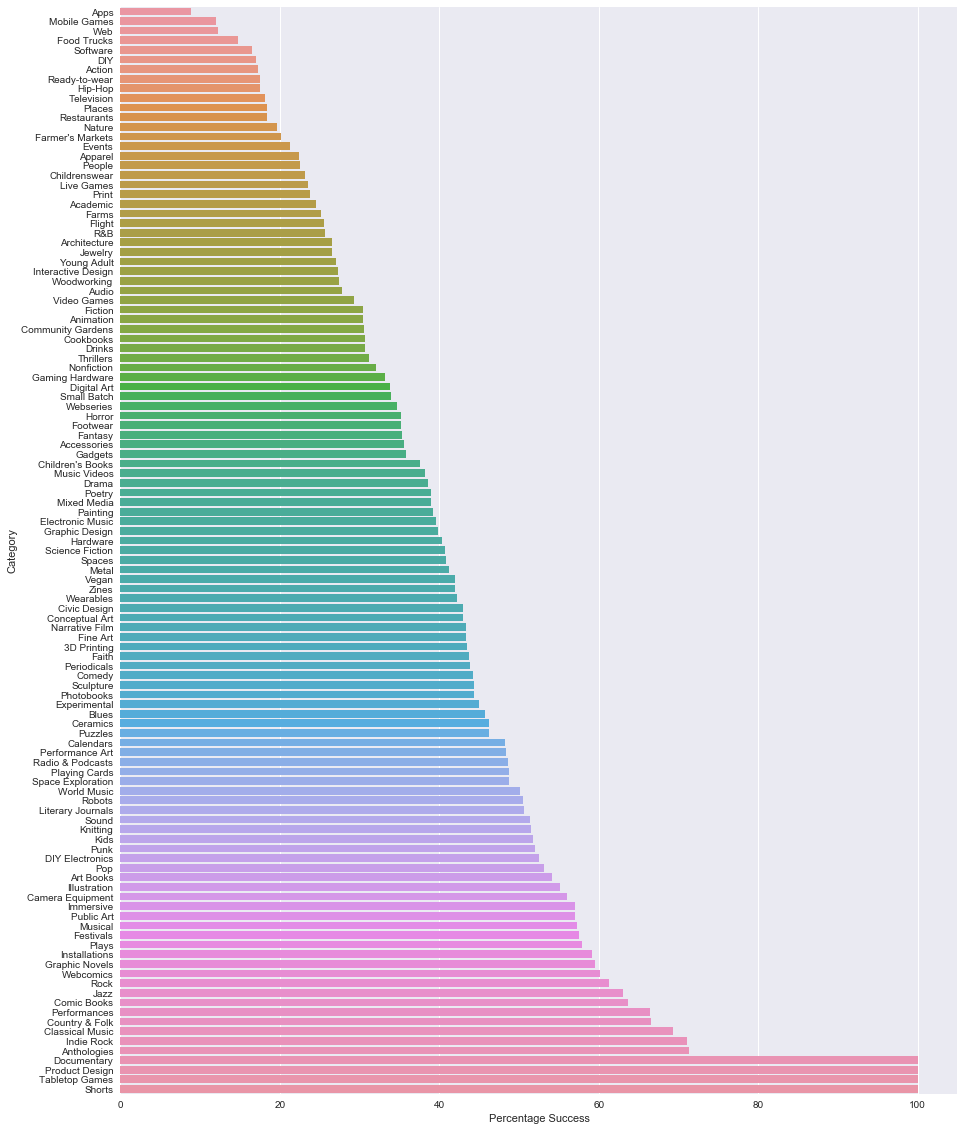

In [342]:
f, (ax1) = plt.subplots(1,1,figsize=(15, 20))

g=sns.barplot(y="category",x="percentage", data=tdf_counts3, ax=ax1)
ax1.set(xlabel='Percentage Success', ylabel='Category')

### Categories with least success (<15%): Apps, Mobile Games, Web, Food Trucks

### Categories with most success (100%): Shorts, Tabletop Games, Product Design, Documentary


## Sentiment Analysis of project name and blurb

In [129]:
#lexicon and rule-based sentiment analysis tool Vader is used
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()
polarity_columns=['data']
ks_us2=ks_us.copy(deep=True)
for i in polarity_columns:
    ks_us2[i]=ks_us2[i].apply(lambda y: analyser.polarity_scores(y.replace('-', ' '))['compound'])

ks_us2.head()

,backers_count,blurb,disable_communication,goal,name,pledged,slug,spotlight,staff_pick,state,usd_pledged,launch_to_deadline,create_to_launch,category,location,location_type,data
1,40,Bring a touring character education play about...,0,3500.0,Kylie for President,3530.0,kylie for president,1,0,1,3530.0,20.537882,18.844549,Plays,"Louisville, KY",Town,0.6996
6,16,The Black and White Theatre Company Inc. is a ...,0,800.0,The Black and White Theatre Company Inc.,1030.0,the black and white theatre company inc,1,0,1,1030.0,18.000000,6.558206,Plays,"Mint Hill, NC",Town,0.9030
7,199,Goldfish Memory Productions seeks at least $12...,0,12000.0,Goldfish Memory Productions,12348.5,goldfish memory productions,1,0,1,12348.5,20.591690,5.426285,Plays,"New York, NY",Town,0.0000
9,30,Bert V. Royal makes a strong statement about d...,0,2000.0,DOG SEES GOD: Confessions of a Teenage Blockhead,2202.0,dog sees god confessions of a teenage blockhead 0,1,0,1,2202.0,34.446285,55.619803,Plays,"Waukesha, WI",Town,0.1737
10,34,In The Dudleys! family memories are brought to...,0,3000.0,Loading Dock Theatre Presents: The Dudleys! A ...,3383.0,loading dock theatre presents the dudleys a fa...,1,0,1,3383.0,21.000000,51.938426,Plays,"Manhattan, NY",County,0.0000


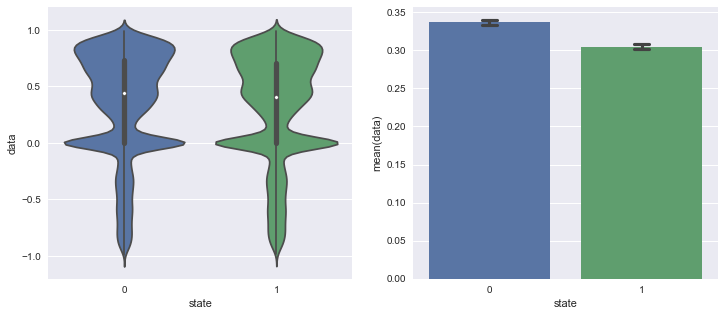

In [352]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(12, 5))
sns.violinplot ('state','data',  data=ks_us2, capsize=.1, ax=ax1)
sns.barplot ('state','data',  data=ks_us2, capsize=.1, ax=ax2)
# sns.plt.ylim(0.25,0.30)

In [356]:
from scipy import stats
Succ_desc=ks_us2[ks_us2.state==1]
Fail_desc=ks_us2[ks_us2.state==0]
t_stat, p_val=stats.ttest_ind(Succ_desc['data'], Fail_desc['data'])
print ("Successful projects: median %.2f" %Succ_desc['data'].median(), " mean %.2f" %Succ_desc['data'].mean())
print ("Successful projects: median %.2f" %Fail_desc['data'].median(), " mean %.2f" %Fail_desc['data'].mean())
print('p-value is', p_val)

Successful projects: median 0.41  mean 0.30
Successful projects: median 0.44  mean 0.34
p-value is 1.45533833867e-36


###  Sentiment analysis on the descriptions and names of projects shows a majority of projects reflect a positive sentiment. Interestingly, the mean sentiment of the population for successful projects is significantly (*p* <<< 0.0001) lower than failed projects. 

In [131]:
ks_us3=ks_us2.copy(True)

In [50]:
ks_us2.head()

,backers_count,blurb,disable_communication,goal,name,pledged,slug,spotlight,staff_pick,state,usd_pledged,launch_to_deadline,create_to_launch,category,location,location_type,data
1,40,Bring a touring character education play about...,0,3500.0,Kylie for President,3530.0,kylie for president,1,0,1,3530.0,20.537882,18.844549,Plays,"Louisville, KY",Town,0.0000
6,16,The Black and White Theatre Company Inc. is a ...,0,800.0,The Black and White Theatre Company Inc.,1030.0,the black and white theatre company inc,1,0,1,1030.0,18.000000,6.558206,Plays,"Mint Hill, NC",Town,0.0000
7,199,Goldfish Memory Productions seeks at least $12...,0,12000.0,Goldfish Memory Productions,12348.5,goldfish memory productions,1,0,1,12348.5,20.591690,5.426285,Plays,"New York, NY",Town,0.0000
9,30,Bert V. Royal makes a strong statement about d...,0,2000.0,DOG SEES GOD: Confessions of a Teenage Blockhead,2202.0,dog sees god confessions of a teenage blockhead 0,1,0,1,2202.0,34.446285,55.619803,Plays,"Waukesha, WI",Town,0.2732
10,34,In The Dudleys! family memories are brought to...,0,3000.0,Loading Dock Theatre Presents: The Dudleys! A ...,3383.0,loading dock theatre presents the dudleys a fa...,1,0,1,3383.0,21.000000,51.938426,Plays,"Manhattan, NY",County,0.0000


In [175]:
ks_us2=ks_us3.copy(True)

## Machine learning model to predict whether a project will succeed or fail

In [176]:
ks_us2=pd.get_dummies(columns=['category'], data=ks_us2) # one-hot encoding

ks_us2.drop(labels=['blurb','name','slug', 'staff_pick', 'spotlight','location', 'usd_pledged', 'location_type'], axis=1  , inplace=True  )


In [177]:
#Separating label from dataset
y=ks_us2.state.copy() # Making a copy of labels
y_bc=ks_us2.backers_count.copy()
y_p=ks_us2.pledged.copy()
sub_train=ks_us2.copy(deep=True)
#dropping columns that will not be available to a new kickstarter project and the label
sub_train.drop(labels=["state", 'pledged', 'backers_count'], axis=1, inplace=True)


In [178]:
sub_train.head()

,disable_communication,goal,launch_to_deadline,create_to_launch,data,category_3D Printing,category_Academic,category_Accessories,category_Action,category_Animals,...,category_Wearables,category_Weaving,category_Web,category_Webcomics,category_Webseries,category_Woodworking,category_Workshops,category_World Music,category_Young Adult,category_Zines
1,0,3500.0,20.537882,18.844549,0.6996,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,800.0,18.000000,6.558206,0.9030,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,12000.0,20.591690,5.426285,0.0000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,2000.0,34.446285,55.619803,0.1737,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,3000.0,21.000000,51.938426,0.0000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [179]:
#Test train split

from sklearn.model_selection import train_test_split #Split data into test and train
X_train, X_test, Y_train, Y_test= train_test_split(sub_train, y, test_size=0.3, random_state=5)



In [181]:
# Y_pred = log.predict(X_test)

In [209]:
#Import libraries:

from sklearn.ensemble import GradientBoostingClassifier 
from sklearn import cross_validation, metrics   
from sklearn.grid_search import GridSearchCV   

import matplotlib.pylab as plt
%matplotlib inline


C:\Program Files\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [247]:
# from https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/
def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], Y_train)
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], Y_train, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(Y_train.values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(Y_train, dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp[1:20].plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')


Model Report
Accuracy : 0.7318
AUC Score (Train): 0.818947
CV Score : Mean - 0.8158271 | Std - 0.004000501 | Min - 0.8095052 | Max - 0.8220275


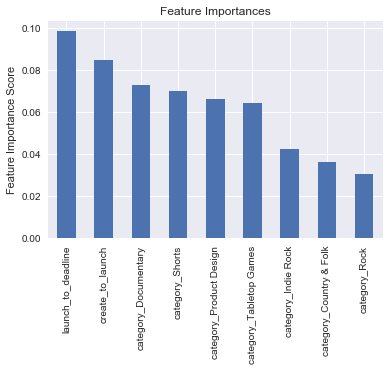

In [215]:
#Choose all predictors except target & IDcols
predictors = [x for x in X_train.columns]
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, X_train, predictors)

### Baseline boosting model has an accuracy of 73% I use grid search to find best parameters for the model and improve the accuracy

In [217]:
#Setting min_samples_split to 0.5 to 1% of total data
len(X_train)/100

1011.19

In [230]:
#Search 1
predictors = [x for x in X_train.columns]
param_test1 = {'n_estimators':list(range(150,280,10))}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.5, min_samples_split=500,min_samples_leaf=50,max_depth=5,max_features='sqrt',subsample=0.8,random_state=10), param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train[predictors],Y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.5, loss='deviance', max_depth=5,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=50, min_samples_split=500,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'n_estimators': [150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [231]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.82926, std: 0.00402, params: {'n_estimators': 150},
  mean: 0.82908, std: 0.00394, params: {'n_estimators': 160},
  mean: 0.82923, std: 0.00387, params: {'n_estimators': 170},
  mean: 0.82931, std: 0.00398, params: {'n_estimators': 180},
  mean: 0.82938, std: 0.00394, params: {'n_estimators': 190},
  mean: 0.82940, std: 0.00401, params: {'n_estimators': 200},
  mean: 0.82924, std: 0.00402, params: {'n_estimators': 210},
  mean: 0.82916, std: 0.00405, params: {'n_estimators': 220},
  mean: 0.82922, std: 0.00393, params: {'n_estimators': 230},
  mean: 0.82908, std: 0.00387, params: {'n_estimators': 240},
  mean: 0.82917, std: 0.00385, params: {'n_estimators': 250},
  mean: 0.82918, std: 0.00380, params: {'n_estimators': 260},
  mean: 0.82914, std: 0.00383, params: {'n_estimators': 270}],
 {'n_estimators': 200},
 0.829401588308482)

In [235]:
#Search 2
param_test2 = {'max_depth':list(range(2,6,2)), 'min_samples_split':list(range(700,1300,200))}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.5, n_estimators=200, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(X_train[predictors],Y_train)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.5, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'max_depth': [2, 4], 'min_samples_split': [700, 900, 1100]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

([mean: 0.82708, std: 0.00428, params: {'max_depth': 2, 'min_samples_split': 700},
  mean: 0.82718, std: 0.00426, params: {'max_depth': 2, 'min_samples_split': 900},
  mean: 0.82713, std: 0.00410, params: {'max_depth': 2, 'min_samples_split': 1100},
  mean: 0.82874, std: 0.00397, params: {'max_depth': 4, 'min_samples_split': 700},
  mean: 0.82965, std: 0.00404, params: {'max_depth': 4, 'min_samples_split': 900},
  mean: 0.82900, std: 0.00418, params: {'max_depth': 4, 'min_samples_split': 1100}],
 {'max_depth': 4, 'min_samples_split': 900},
 0.8296502765533702)

In [236]:
#Search 3
param_test3 = { 'min_samples_leaf':list(range(30,71,10))}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.5,min_samples_split=900, n_estimators=200,max_depth=4,max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train[predictors],Y_train)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.5, loss='deviance', max_depth=4,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=900,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'min_samples_leaf': [30, 40, 50, 60, 70]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

([mean: 0.82924, std: 0.00397, params: {'min_samples_leaf': 30},
  mean: 0.82937, std: 0.00390, params: {'min_samples_leaf': 40},
  mean: 0.82928, std: 0.00366, params: {'min_samples_leaf': 50},
  mean: 0.82892, std: 0.00392, params: {'min_samples_leaf': 60},
  mean: 0.82890, std: 0.00342, params: {'min_samples_leaf': 70}],
 {'min_samples_leaf': 40},
 0.8293668560448726)


Model Report
Accuracy : 0.7512
AUC Score (Train): 0.838573
CV Score : Mean - 0.8293669 | Std - 0.003897763 | Min - 0.8235839 | Max - 0.8340685


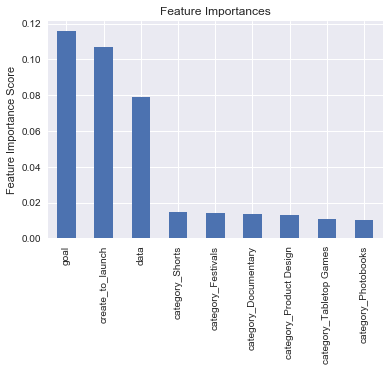

In [237]:
modelfit(gsearch3.best_estimator_,  X_train, predictors)

In [240]:
np.sqrt(len(X_train.columns)) # number of features

12.206555615733702

In [242]:
#Search 4
param_test4 = {'max_features':list(range(10,26,2))}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.5, n_estimators=200,max_depth=4, min_samples_split=900, min_samples_leaf=40, subsample=0.8, random_state=10),
param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(X_train[predictors],Y_train)
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.5, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=40, min_samples_split=900,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'max_features': [10, 12, 14, 16, 18, 20, 22, 24]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

([mean: 0.82928, std: 0.00388, params: {'max_features': 10},
  mean: 0.82937, std: 0.00390, params: {'max_features': 12},
  mean: 0.83041, std: 0.00421, params: {'max_features': 14},
  mean: 0.83018, std: 0.00430, params: {'max_features': 16},
  mean: 0.82993, std: 0.00391, params: {'max_features': 18},
  mean: 0.82966, std: 0.00403, params: {'max_features': 20},
  mean: 0.83000, std: 0.00413, params: {'max_features': 22},
  mean: 0.82979, std: 0.00388, params: {'max_features': 24}],
 {'max_features': 14},
 0.8304113328974079)

In [243]:
#Search 5
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.5, n_estimators=200,max_depth=4,min_samples_split=900, min_samples_leaf=40, random_state=10,max_features=14),
param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(X_train[predictors],Y_train)
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.5, loss='deviance', max_depth=4,
              max_features=14, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=40, min_samples_split=900,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=10, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'subsample': [0.6, 0.7, 0.75, 0.8, 0.85, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

([mean: 0.82893, std: 0.00405, params: {'subsample': 0.6},
  mean: 0.82959, std: 0.00388, params: {'subsample': 0.7},
  mean: 0.82982, std: 0.00384, params: {'subsample': 0.75},
  mean: 0.83041, std: 0.00421, params: {'subsample': 0.8},
  mean: 0.82999, std: 0.00418, params: {'subsample': 0.85},
  mean: 0.83030, std: 0.00367, params: {'subsample': 0.9}],
 {'subsample': 0.8},
 0.8304113328974079)


Model Report
Accuracy : 0.7532
AUC Score (Train): 0.841758
CV Score : Mean - 0.8318832 | Std - 0.004031261 | Min - 0.8260623 | Max - 0.8372739


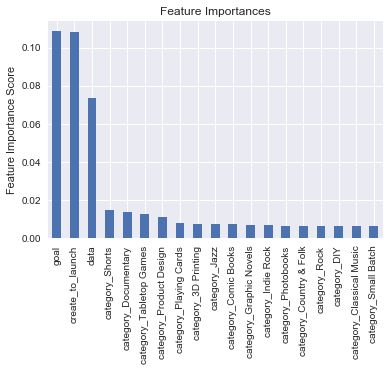

In [248]:
#Tuned model
gbm_tuned_4 = GradientBoostingClassifier(learning_rate=0.1, n_estimators=1000,max_depth=4, min_samples_split=900, min_samples_leaf=40, subsample=0.85, random_state=10, max_features=14,
warm_start=True)
modelfit(gbm_tuned_4, X_train, predictors)

### Tuning the model increases accuracy by 2%.

### Feature importance of the final model is different from the baseline model, goal and sentiment of the text move up in importance. Also, category variables that are important in the model have closer scores.

In [249]:
Y_pred_boost = gbm_tuned_4.predict(X_test)
score_boost_train=gbm_tuned_4.score(X_train, Y_train)*100
score_boost_train

75.316211592282357

### Model performs equally well on unseen test data.

In [250]:
score_random_boost=gbm_tuned_4.score(X_test, Y_test)*100
score_random_boost

74.380451336009969

In [252]:
Y_pred_boost=gbm_tuned_4.predict (X_test)

### Precision, recall and f1-score

In [254]:
from sklearn import metrics
print(metrics.classification_report( Y_test, Y_pred_boost))

             precision    recall  f1-score   support

          0       0.73      0.81      0.77     22617
          1       0.76      0.68      0.72     20721

avg / total       0.75      0.74      0.74     43338



## Summary:

### Data exploration

1. Successful projects have smaller financial goals. 

2. Projects under spotlight have a 100% chance of success.

3. If the project is a staff pick, chance of success is doubled.

4. Many more successful projects set deadline to ~30 days after launch than failed projects, 30 day projects may produce a sense of urgency while giving enough time to find backers.

5. Categories with least success (<15%): Apps, Mobile Games, Web, Food Trucks

6. Categories with most success (100%): Shorts, Tabletop Games, Product Design, Documentary

### Machine learning:

1. Boosting model predicts success of a kickstarter project from the financial goal, category, time from creating the project to launching it, and the deadline set after launch, with 75% accuracy;
2. Top three features: (i) Financial goal; (ii) time from creation to launch; and (iii) sentiment of project name and blurb.